In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['deliveries.csv', 'matches.csv']


In [3]:
matches = pd.read_csv("../input/matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries = pd.read_csv("../input/deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


* Lets look at the players who have scored most 50s among all seasons.

In [19]:
aggregatedata = pd.merge(matches,deliveries,left_on = 'id',right_on = 'match_id')
fifty = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','season']).agg({'batsman_runs':'sum'}))
fifty = fifty[np.logical_and(fifty['batsman_runs'] >= 50,fifty['batsman_runs'] <= 100)]
fifty.reset_index(inplace = True)
fifty.head()

,match_id,batsman,season,batsman_runs
0,1,MC Henriques,2017,52
1,1,Yuvraj Singh,2017,62
2,2,AM Rahane,2017,60
3,2,SPD Smith,2017,84
4,3,CA Lynn,2017,93


In [20]:
print('Total 50 scores in all the seasons :',len(fifty))

Total 50 scores in all the seasons : 1024


In [33]:
for groups in fifty.groupby(['season']):
    print('Fifties in season ',groups[0], ':',len(groups[1]['batsman_runs']))

Fifties in season  2008 : 83
Fifties in season  2009 : 70
Fifties in season  2010 : 89
Fifties in season  2011 : 90
Fifties in season  2012 : 96
Fifties in season  2013 : 100
Fifties in season  2014 : 92
Fifties in season  2015 : 90
Fifties in season  2016 : 111
Fifties in season  2017 : 95
Fifties in season  2018 : 108


Now lets look at the players who has scored most fifties across all seasons.

In [35]:
fifty_season = pd.DataFrame(fifty.groupby(['batsman']).agg({'batsman_runs' : 'count'}))
fifty_season.reset_index(inplace = True)
fifty_season.columns = ['batsman','Total Fifties']
fifty_season = fifty_season.sort_values(by = 'Total Fifties',ascending = False)
fifty_season.head()

,batsman,Total Fifties
135,V Kohli,37
26,DA Warner,36
37,G Gambhir,36
117,SK Raina,36
101,RG Sharma,34


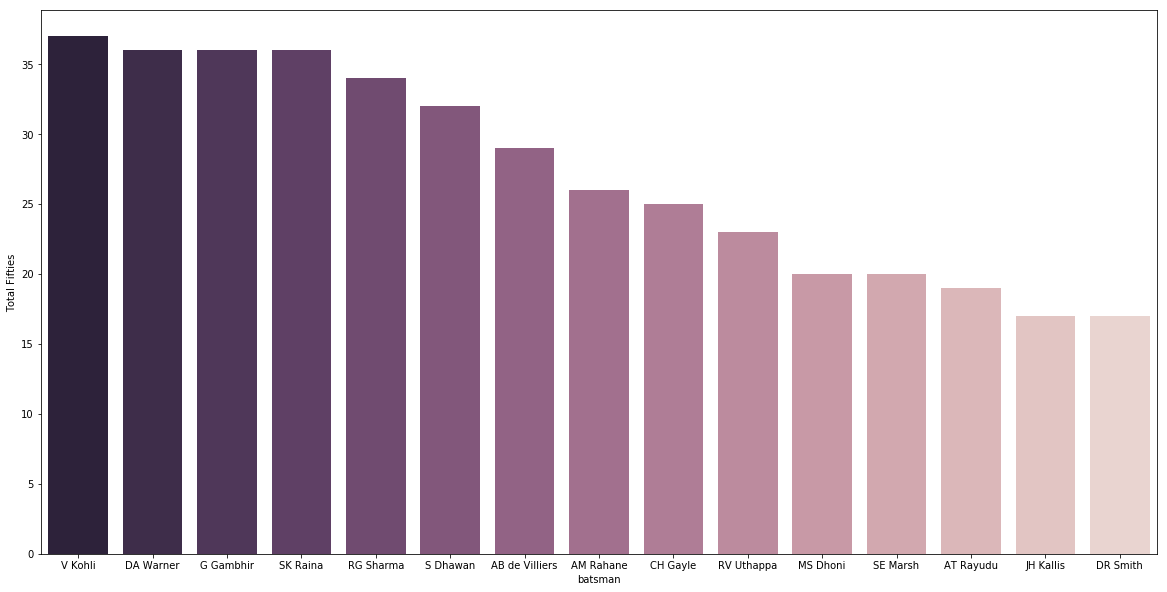

In [44]:
plt.rcParams['figure.figsize'] = 20,10
sns.barplot(x = 'batsman',y = 'Total Fifties',data = fifty_season.head(15),palette = reversed(sns.cubehelix_palette(15)))

This tells us about the player who have scored most fifties across all seasons ( excluding the 100s.)

Now lets look at how they have performed each season.

In [46]:
fifty_eseason = pd.DataFrame(fifty.groupby(['season','batsman']).agg({'batsman_runs' : 'count'}))
fifty_eseason.reset_index(inplace = True)
fifty_eseason.columns = ['Season','Batsman','Total Fifties']
fifty_eseason = fifty_eseason.sort_values(by = ['Season','Total Fifties'],ascending = False)
fifty_eseason.head()

,Season,Batsman,Total Fifties
447,2018,KS Williamson,9
428,2018,AB de Villiers,6
432,2018,AT Rayudu,5
441,2018,JC Buttler,5
446,2018,KL Rahul,5


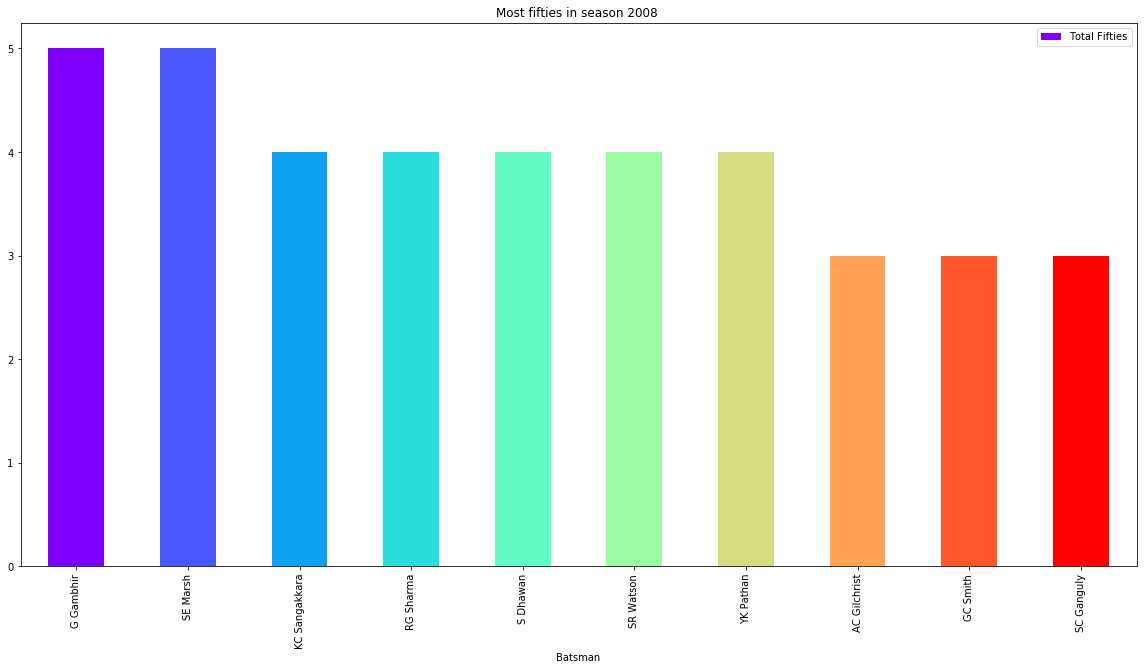

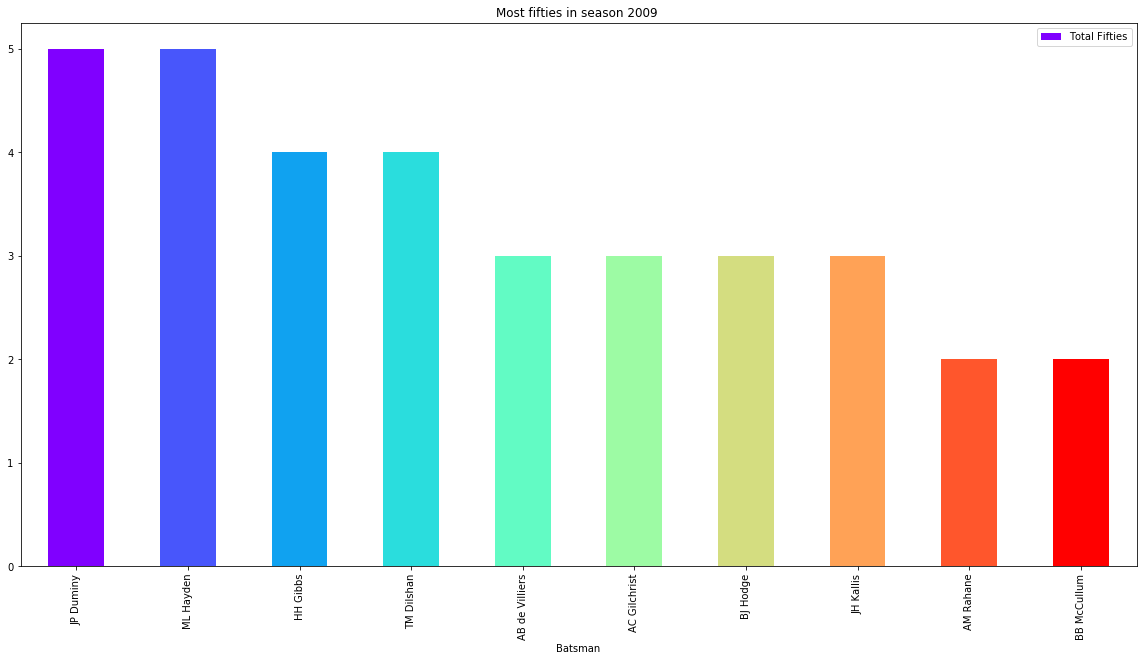

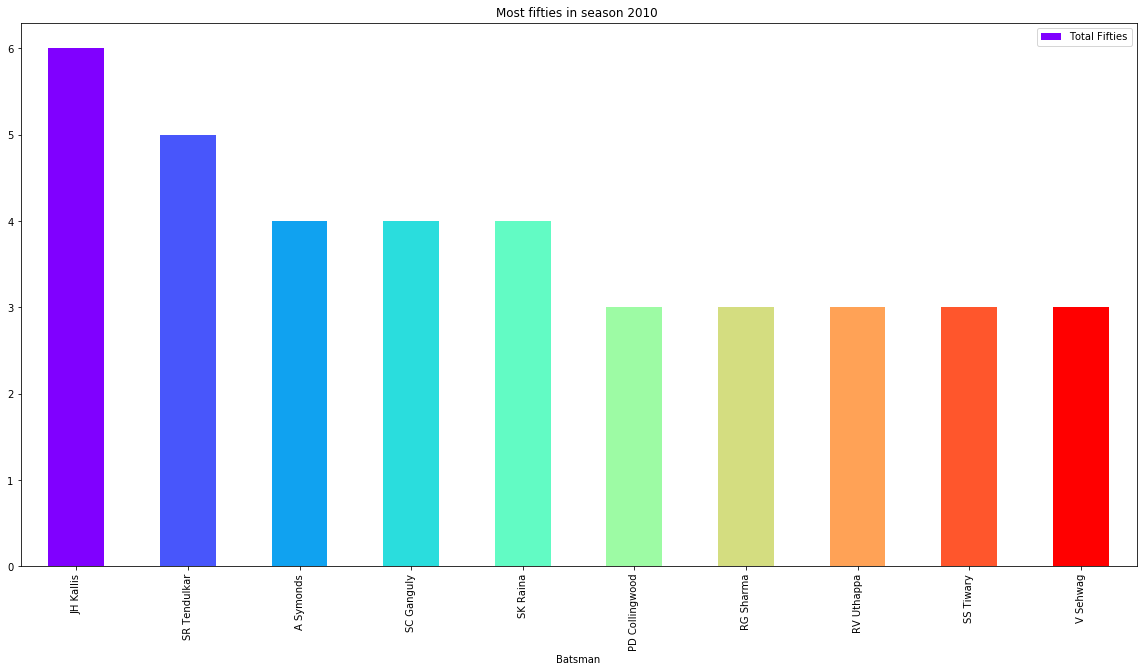

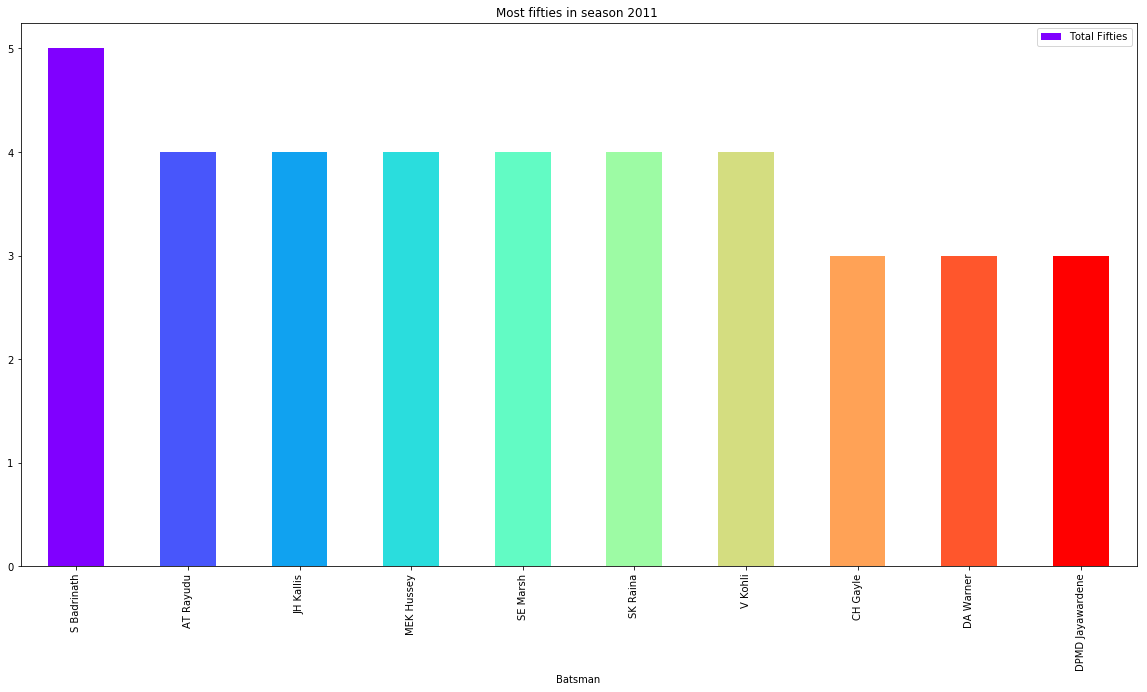

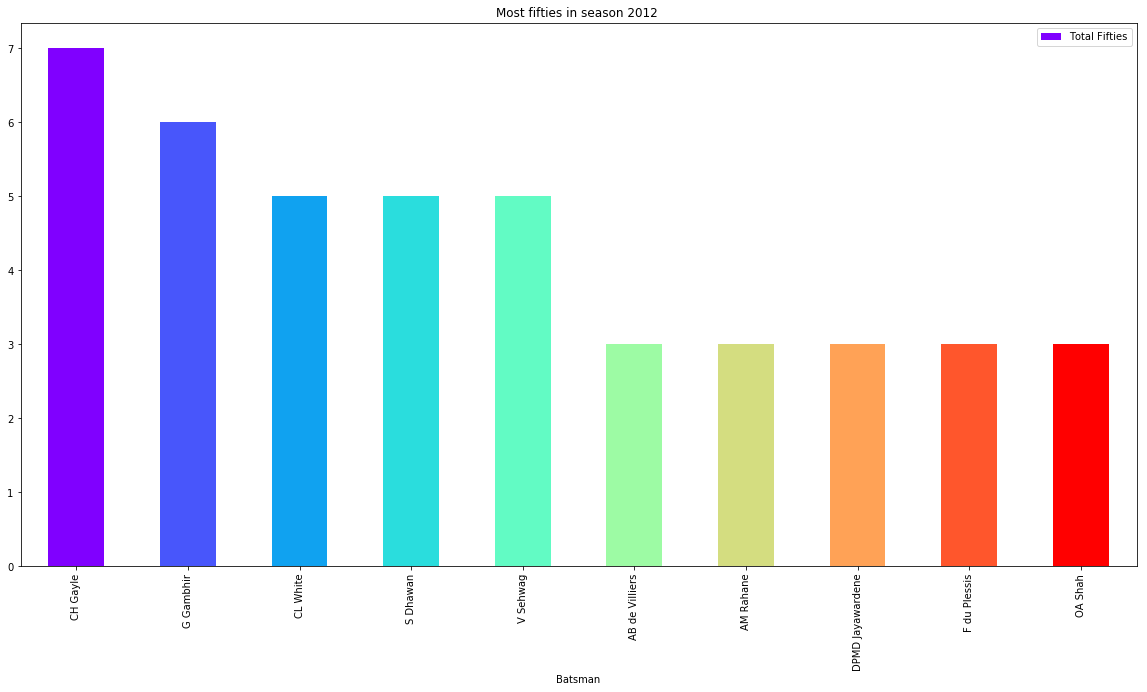

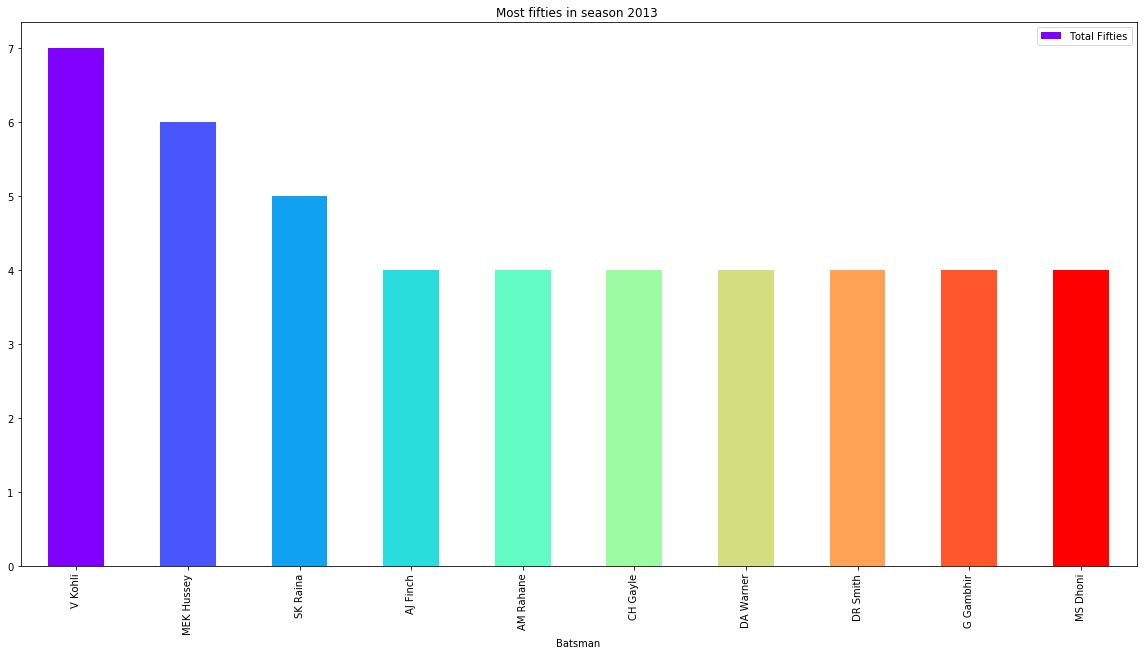

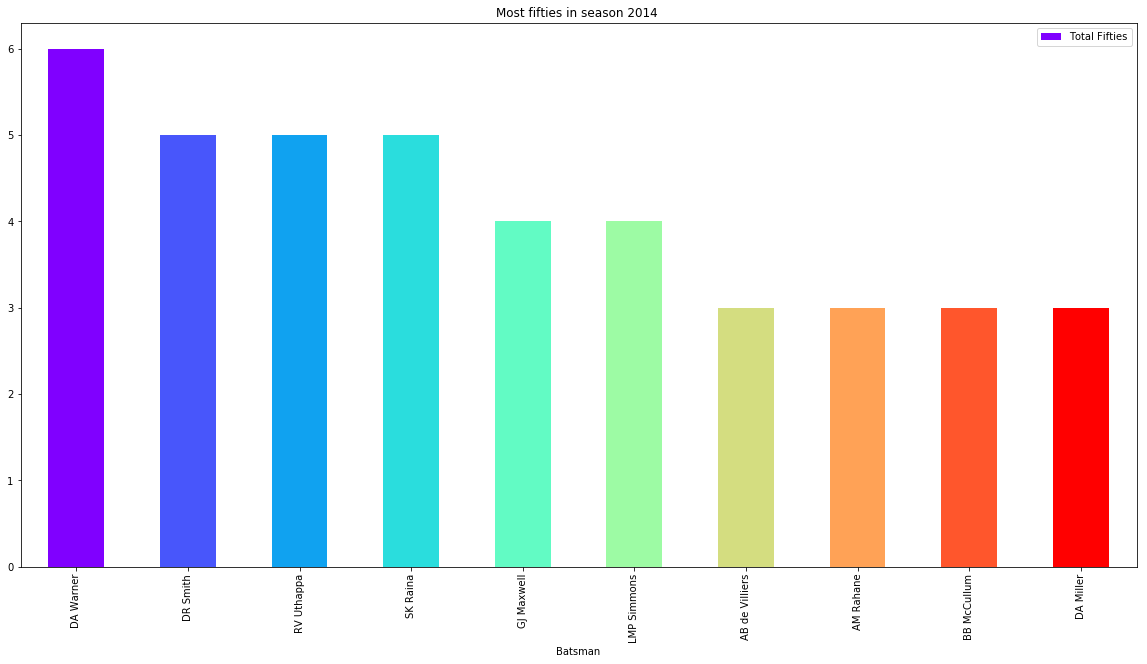

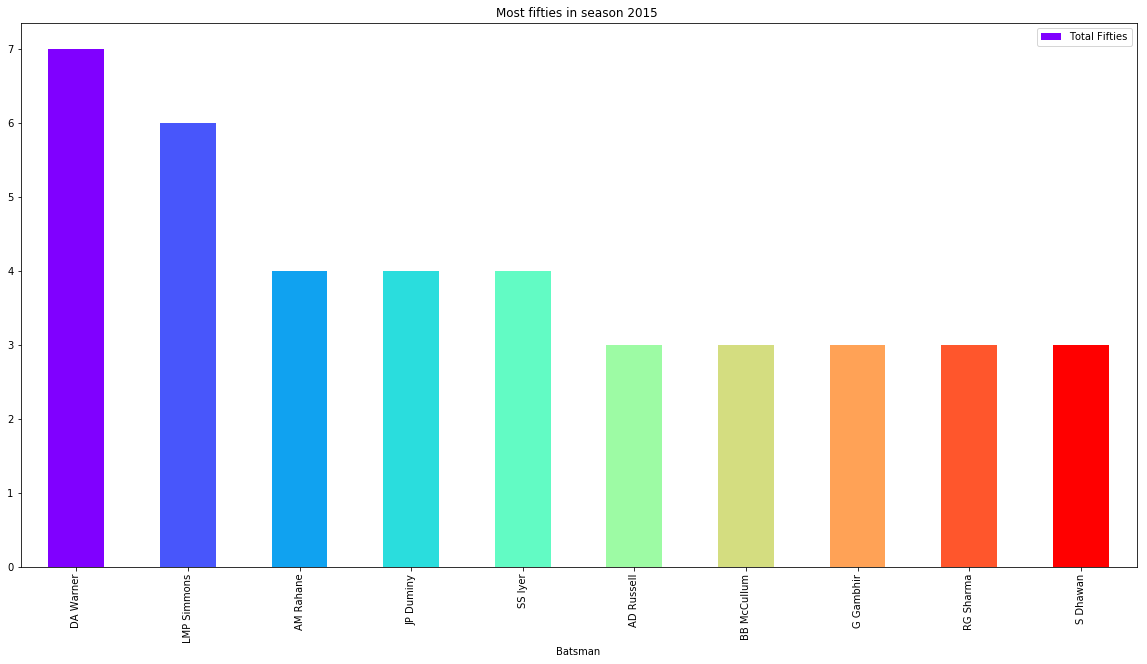

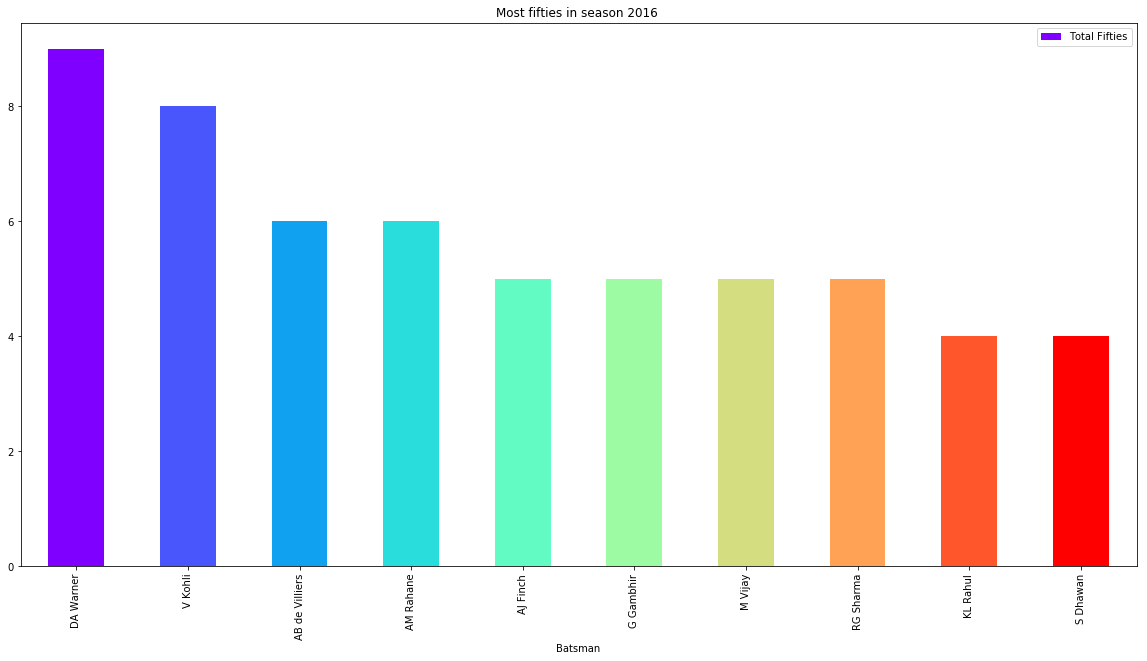

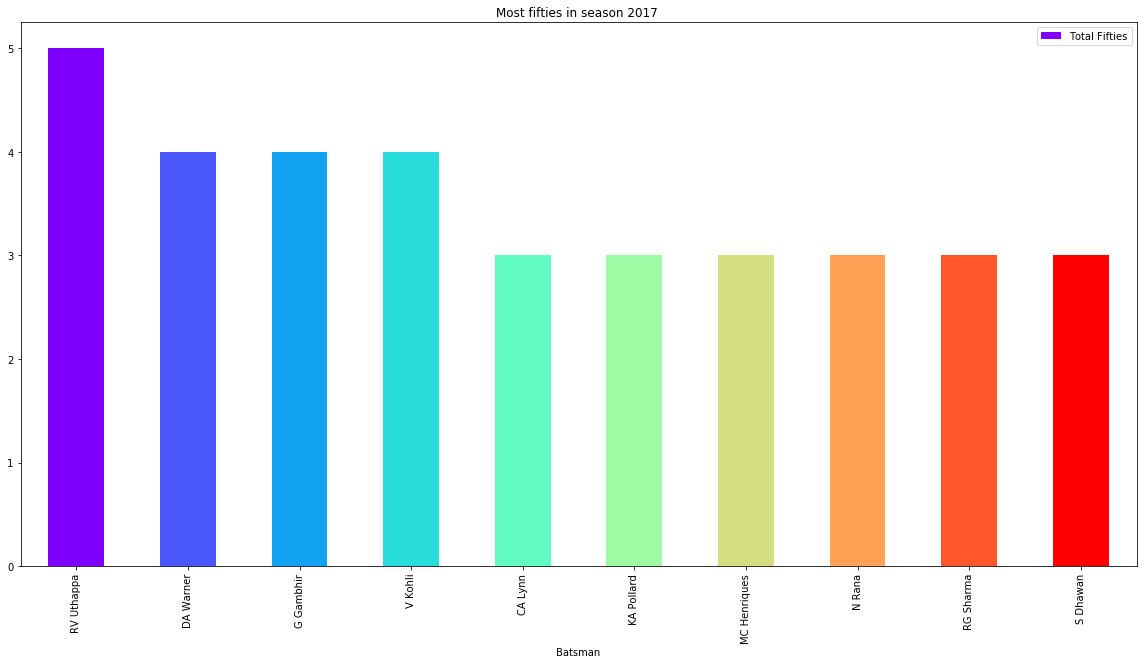

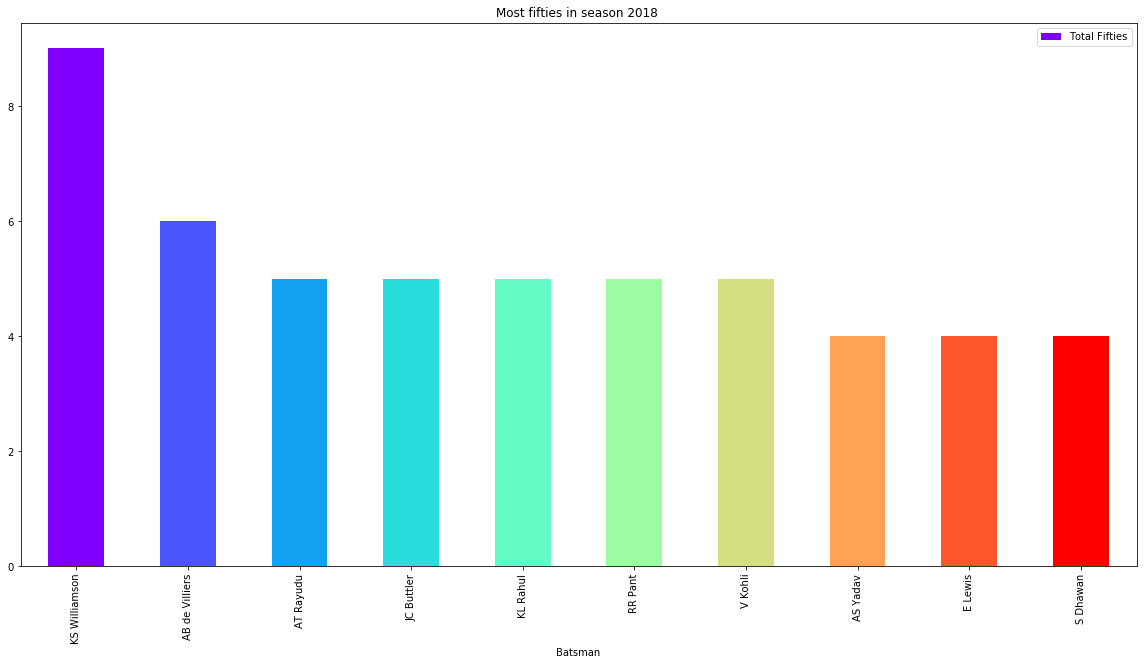

In [58]:
colors = cm.rainbow(np.linspace(0,1,10))
for title,groups in fifty_eseason.groupby(['Season']):
    groups.head(10).plot(x ='Batsman',y = 'Total Fifties',kind = 'bar',color = colors)
    plt.title('Most fifties in season %s '%title)

Scoring fifty does not matter always, sometimes it is important that it comes in a winning cause. So lets look at how many fifites came in a winning cause across all season.

In [82]:
fifty_win = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','season','winner','batting_team']).agg({'batsman_runs':'sum'}))
fifty_win = fifty[np.logical_and(fifty['batsman_runs'] >= 50,fifty['batsman_runs'] <= 100)]
fifty_win.reset_index(inplace = True)
fifty_win.head(10)

,index,match_id,batsman,season,winner,batting_team,batsman_runs
0,0,1,MC Henriques,2017,Sunrisers Hyderabad,Sunrisers Hyderabad,52
1,1,1,Yuvraj Singh,2017,Sunrisers Hyderabad,Sunrisers Hyderabad,62
2,2,2,AM Rahane,2017,Rising Pune Supergiant,Rising Pune Supergiant,60
3,3,2,SPD Smith,2017,Rising Pune Supergiant,Rising Pune Supergiant,84
4,4,3,CA Lynn,2017,Kolkata Knight Riders,Kolkata Knight Riders,93
5,5,3,G Gambhir,2017,Kolkata Knight Riders,Kolkata Knight Riders,76
6,6,3,SK Raina,2017,Kolkata Knight Riders,Gujarat Lions,68
7,7,4,BA Stokes,2017,Kings XI Punjab,Rising Pune Supergiant,50
8,8,5,KM Jadhav,2017,Royal Challengers Bangalore,Royal Challengers Bangalore,69
9,9,5,RR Pant,2017,Royal Challengers Bangalore,Delhi Daredevils,57


In [83]:
fifty_win = fifty_win[fifty_win['winner'] == fifty_win['batting_team']]
columns = ['batsman','season','batsman_runs']
fifty_win = fifty_win[columns]
fifty_win = pd.DataFrame(fifty_win.groupby(['batsman']).agg({'batsman_runs': 'count'}))
fifty_win.reset_index(inplace = True)
fifty_win.head(10)

,batsman,batsman_runs
0,A Symonds,4
1,AB de Villiers,19
2,AC Blizzard,1
3,AC Gilchrist,6
4,AD Mathews,1
5,AD Russell,4
6,AJ Finch,8
7,AM Rahane,17
8,AP Tare,1
9,AS Yadav,2


In [84]:
fifty_win = pd.merge(fifty_win,fifty_season,left_on = 'batsman',right_on = 'batsman')
fifty_win.head()

,batsman,batsman_runs,Total Fifties
0,A Symonds,4,5
1,AB de Villiers,19,29
2,AC Blizzard,1,1
3,AC Gilchrist,6,11
4,AD Mathews,1,1


In [85]:
fifty_win['Total 50s in Winning Cause'] = fifty_win['batsman_runs']/fifty_win['Total Fifties']*100

In [86]:
fifty_win.head()

,batsman,batsman_runs,Total Fifties,Total 50s in Winning Cause
0,A Symonds,4,5,80.000000
1,AB de Villiers,19,29,65.517241
2,AC Blizzard,1,1,100.000000
3,AC Gilchrist,6,11,54.545455
4,AD Mathews,1,1,100.000000


Now we have a list of the players and there 50s in winning cause. Let us see how many in total were in winning cause.

In [102]:
print('Total fifties in Winning Cause:',np.sum(fifty_win['batsman_runs']))
print('Total % of 50s in Winning Cause:',round(np.sum(fifty_win['batsman_runs'])/np.sum(fifty_win['Total Fifties'])*100,2))     

Total fifties in Winning Cause: 627
Total % of 50s in Winning Cause: 62.76


So we see that 62% of the fifties were in winning causes.

To get a substantial idea about each player impact while scoring 50s we will only take those players who has scored atleast 10 fifties.

In [106]:
fifty_win = fifty_win[fifty_win['Total Fifties'] >= 10]
fifty_win = fifty_win.sort_values(by = 'Total 50s in Winning Cause',ascending = False)
fifty_win.head(10)

,batsman,batsman_runs,Total Fifties,Total 50s in Winning Cause
65,MEK Hussey,14,15,93.333333
106,SR Watson,13,16,81.250000
51,KK Nair,8,10,80.000000
105,SR Tendulkar,11,14,78.571429
73,MS Dhoni,15,20,75.000000
58,LMP Simmons,9,12,75.000000
120,YK Pathan,11,15,73.333333
31,G Gambhir,26,36,72.222222
13,BB McCullum,10,14,71.428571
27,DR Smith,12,17,70.588235


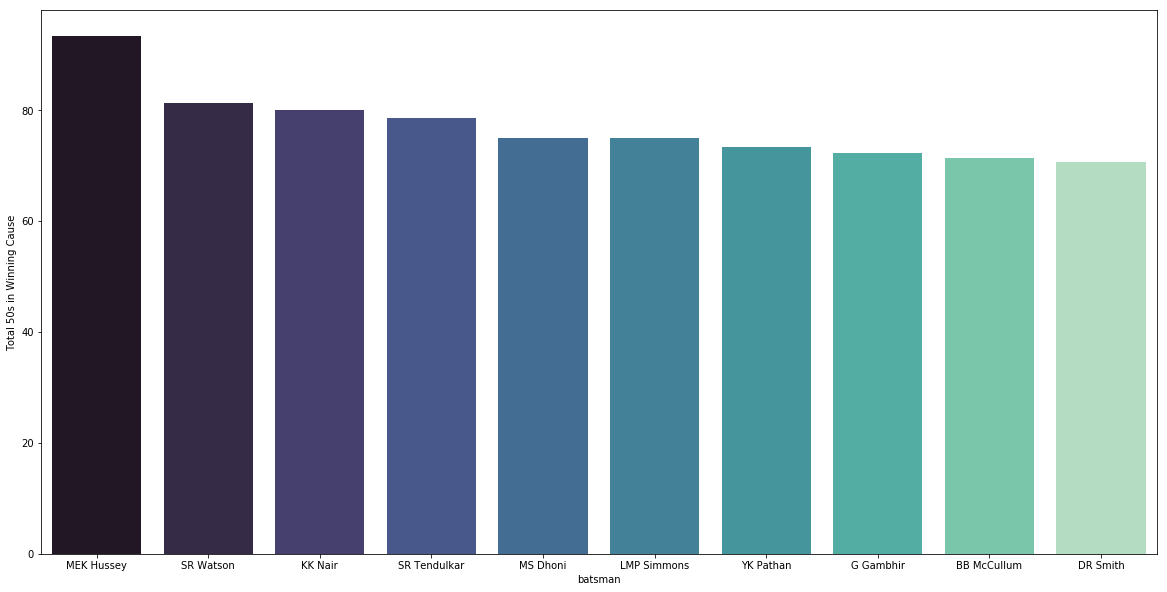

In [108]:
sns.barplot(x = 'batsman',y = 'Total 50s in Winning Cause',data = fifty_win.head(10),palette = reversed(sns.color_palette("mako_r", 10)))

So this are the players whose performance have great impact on their teams winning chances

Now lets look at the players who have scored most 50s and still their team lost.

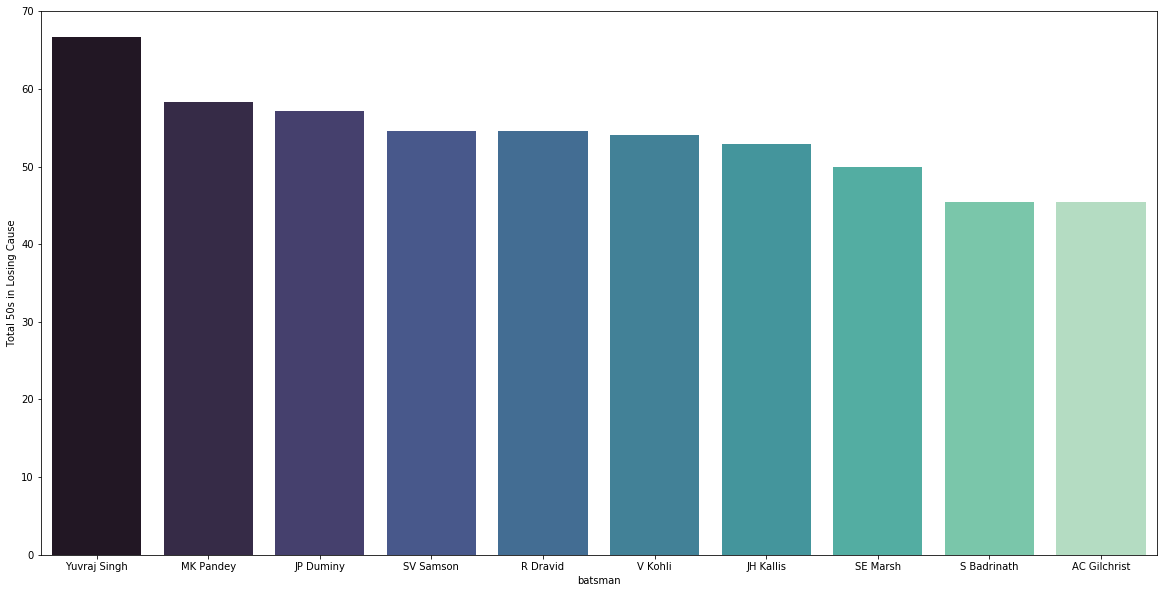

In [118]:
fifty_win['Total 50s in Losing Cause'] = 100 - fifty_win['Total 50s in Winning Cause']
fifty_win = fifty_win.sort_values(by = ['Total 50s in Losing Cause'],ascending = False)
sns.barplot(x = 'batsman',y = 'Total 50s in Losing Cause',data = fifty_win.head(10),palette = reversed(sns.color_palette("mako_r", 10)))

This are the players who have the worst rate when it comes to impacting their teams winning chances with their 50s. Strangely Yuvraj Singh who has been such an impact player is at the top of the list. 

Now only scoring 50s is not enough. Sometime the speed at which you score the 50 is equally important. So now lets look at the strike rate of each of this players when they scored 50s.

In [121]:
fifty_sr = pd.DataFrame(aggregatedata.groupby(['match_id','batsman']).agg({'batsman_runs':'sum','ball':'count'}))
fifty_sr = fifty_sr[np.logical_and(fifty_sr['batsman_runs'] >= 50,fifty_sr['batsman_runs'] <= 100)]
fifty_sr.reset_index(inplace = True)
fifty_sr.head()

,match_id,batsman,batsman_runs,ball
0,1,MC Henriques,52,37
1,1,Yuvraj Singh,62,30
2,2,AM Rahane,60,34
3,2,SPD Smith,84,55
4,3,CA Lynn,93,46


In [127]:
fifty_sr = pd.DataFrame(fifty_sr.groupby(['batsman']).agg({'batsman_runs':'sum','ball' : 'sum'}))
fifty_sr = fifty_sr[fifty_sr['batsman_runs'] > 800] # Equivalent to saying they might have scored atleast 15 fifties
fifty_sr['Strike Rate'] = fifty_sr['batsman_runs']/fifty_sr['ball']*100
fifty_sr.reset_index(inplace = True)
fifty_sr = fifty_sr.sort_values(by = ['Strike Rate'],ascending = False)

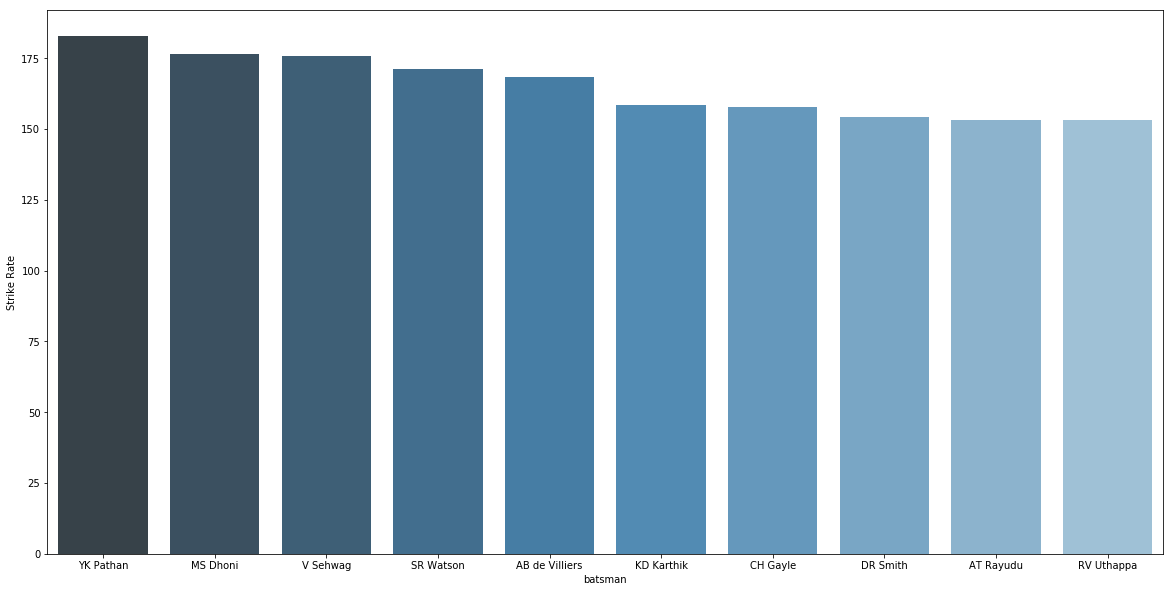

In [130]:
sns.barplot(x = 'batsman',y = 'Strike Rate',data = fifty_sr.head(10),palette = "Blues_d")

So we can see that most of the times when YK Pathan and MS Dhone scores fifty they scores it at a great rate almost around 180. It is not strange to see most of the players we have in the list are great strikers of the ball and that is actually part of their natural game.

There are many more analysis that can be done on the 50s scored by players. We would end it by looking at which team has scored most fifties and which team has conceded most 50s.

In [135]:
fifty_scored = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','batting_team']).agg({'batsman_runs':'sum'}))
fifty_scored = fifty_scored[np.logical_and(fifty_scored['batsman_runs'] >= 50,fifty_scored['batsman_runs'] <= 100)]
fifty_scored.reset_index(inplace = True)
fifty_scored.head()

,match_id,batsman,batting_team,batsman_runs
0,1,MC Henriques,Sunrisers Hyderabad,52
1,1,Yuvraj Singh,Sunrisers Hyderabad,62
2,2,AM Rahane,Rising Pune Supergiant,60
3,2,SPD Smith,Rising Pune Supergiant,84
4,3,CA Lynn,Kolkata Knight Riders,93


In [136]:
fifty_scored = pd.DataFrame(fifty_scored.groupby(['batting_team']).agg({'batsman_runs':'count'}))
fifty_scored.reset_index(inplace = True)
fifty_scored.columns = ['batting_team','Total Fifties']
fifty_scored = fifty_scored.sort_values(by = ['Total Fifties'],ascending = False)
fifty_scored

,batting_team,Total Fifties
7,Mumbai Indians,141
12,Royal Challengers Bangalore,130
0,Chennai Super Kings,125
2,Delhi Daredevils,120
6,Kolkata Knight Riders,118
4,Kings XI Punjab,105
9,Rajasthan Royals,86
13,Sunrisers Hyderabad,77
1,Deccan Chargers,51
3,Gujarat Lions,27


So we can see the MI,RCB and CSK are the top 3 teams with most number of players scoring 50s. 

In [173]:
fifty_conceded = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','bowling_team']).agg({'batsman_runs':'sum'}))
fifty_conceded = fifty_conceded[np.logical_and(fifty_conceded['batsman_runs'] >= 50,fifty_conceded['batsman_runs'] <= 100)]
fifty_conceded.reset_index(inplace = True)
fifty_conceded.head()

,match_id,batsman,bowling_team,batsman_runs
0,1,MC Henriques,Royal Challengers Bangalore,52
1,1,Yuvraj Singh,Royal Challengers Bangalore,62
2,2,AM Rahane,Mumbai Indians,60
3,2,SPD Smith,Mumbai Indians,84
4,3,CA Lynn,Gujarat Lions,93


In [174]:
fifty_conceded = pd.DataFrame(fifty_conceded.groupby(['bowling_team']).agg({'batsman_runs':'count'}))
fifty_conceded.reset_index(inplace = True)
fifty_conceded.columns = ['bowling_team','Total Fifties']
fifty_conceded = fifty_conceded.sort_values(by = ['Total Fifties'],ascending = False)
fifty_conceded

,bowling_team,Total Fifties
4,Kings XI Punjab,144
12,Royal Challengers Bangalore,132
7,Mumbai Indians,119
2,Delhi Daredevils,118
0,Chennai Super Kings,115
9,Rajasthan Royals,97
6,Kolkata Knight Riders,96
13,Sunrisers Hyderabad,67
1,Deccan Chargers,47
8,Pune Warriors,32


And as we can see KXIP has  most 50s scored against them. MI and RCB who were in the top3 of most 50s scored are also in the top 3 here. This might have to do with the fact that they play on pitches that are 

Now all of the analysis we have done on 50s can be done on 100s. It might not be that interesting since not many 100s have been scored , but it would still be worthwhile to look at it.

Lets look at the players who have scored most 100s among all seasons.

In [175]:
hundred = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','season']).agg({'batsman_runs':'sum'}))
hundred = hundred[hundred['batsman_runs'] >= 100]
hundred.reset_index(inplace = True)
hundred.head()

,match_id,batsman,season,batsman_runs
0,9,SV Samson,2017,102
1,22,HM Amla,2017,104
2,36,DA Warner,2017,126
3,38,BA Stokes,2017,103
4,46,HM Amla,2017,104


In [176]:
print('Total 100s scores in all the seasons :',len(hundred))

Total 100s scores in all the seasons : 53


In [177]:
for groups in hundred.groupby(['season']):
    print('Hundreds in season ',groups[0], ':',len(groups[1]['batsman_runs']))

Hundreds in season  2008 : 6
Hundreds in season  2009 : 2
Hundreds in season  2010 : 4
Hundreds in season  2011 : 6
Hundreds in season  2012 : 6
Hundreds in season  2013 : 4
Hundreds in season  2014 : 3
Hundreds in season  2015 : 4
Hundreds in season  2016 : 7
Hundreds in season  2017 : 5
Hundreds in season  2018 : 6


Now lets look at the players who has scored most fifties across all seasons.

In [190]:
hundred_season = pd.DataFrame(hundred.groupby(['batsman']).agg({'batsman_runs' : 'count'}))
hundred_season.reset_index(inplace = True)
hundred_season.columns = ['batsman','Total Hundred']
hundred_season = hundred_season.sort_values(by = 'Total Hundred',ascending = False)
#np.sum(hundred_season['Total Hundred'])
hundred_season.head()

,batsman,Total Hundred
7,CH Gayle,6
29,V Kohli,4
26,SR Watson,4
9,DA Warner,3
1,AB de Villiers,3


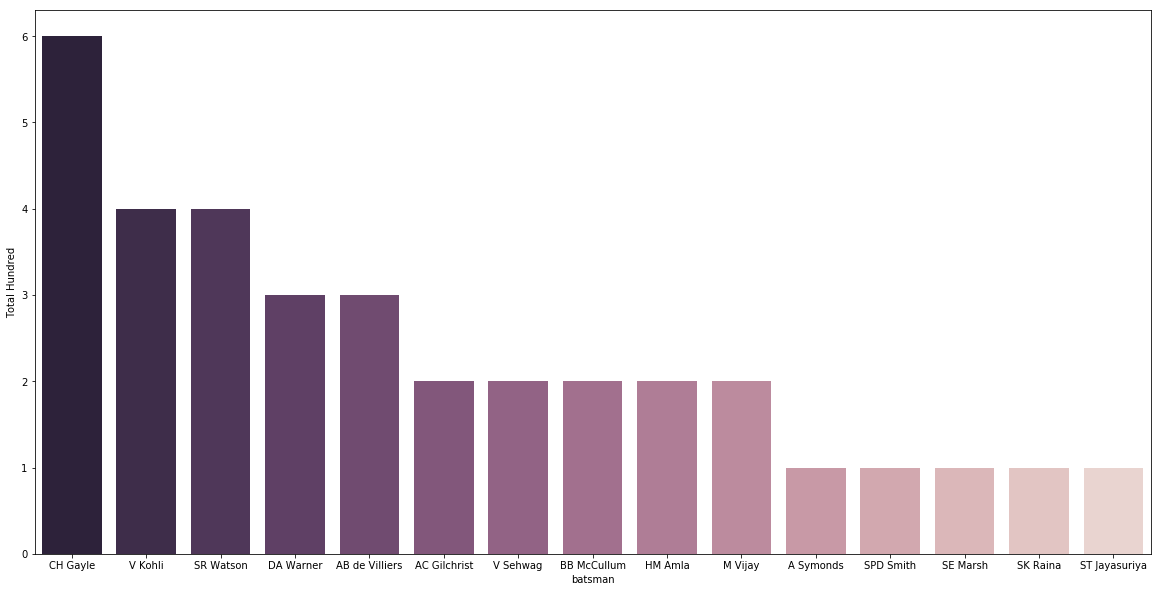

In [179]:
plt.rcParams['figure.figsize'] = 20,10
sns.barplot(x = 'batsman',y = 'Total Hundred',data = hundred_season.head(15),palette = reversed(sns.cubehelix_palette(15)))

This tells us about the player who have scored most centuries across all seasons

In [191]:
hundred_eseason = pd.DataFrame(hundred.groupby(['season','batsman']).agg({'batsman_runs' : 'count'}))
hundred_eseason.reset_index(inplace = True)
hundred_eseason.columns = ['Season','Batsman','Total Hundred']
hundred_eseason = hundred_eseason.sort_values(by = ['Season','Total Hundred'],ascending = False)
hundred_eseason.head()

53

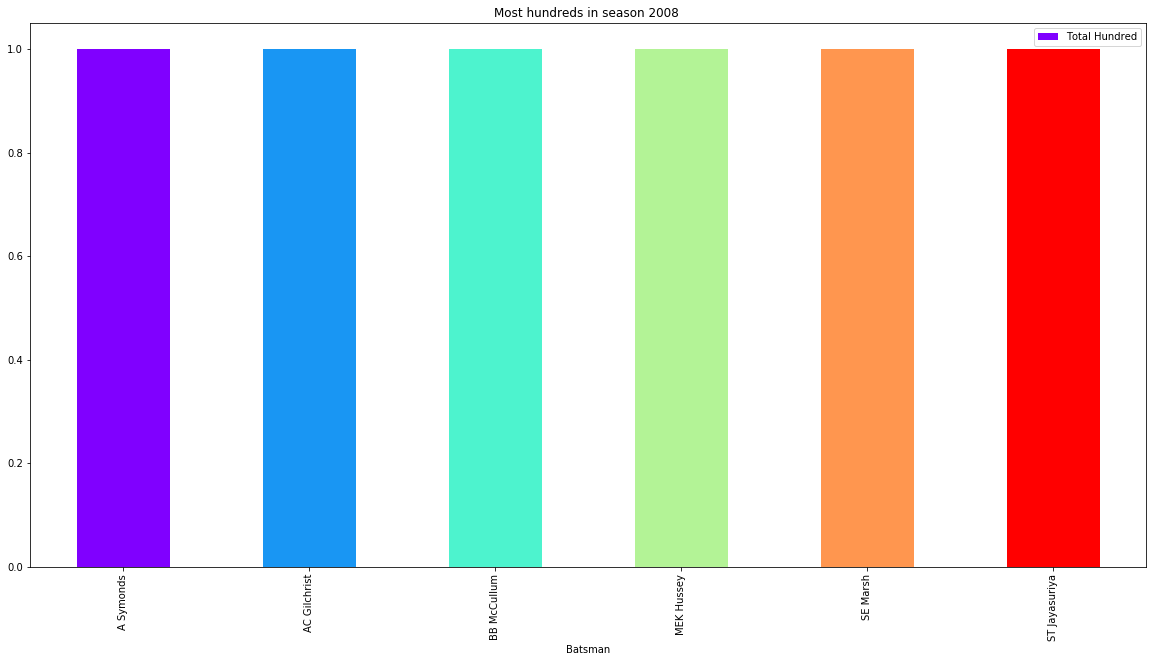

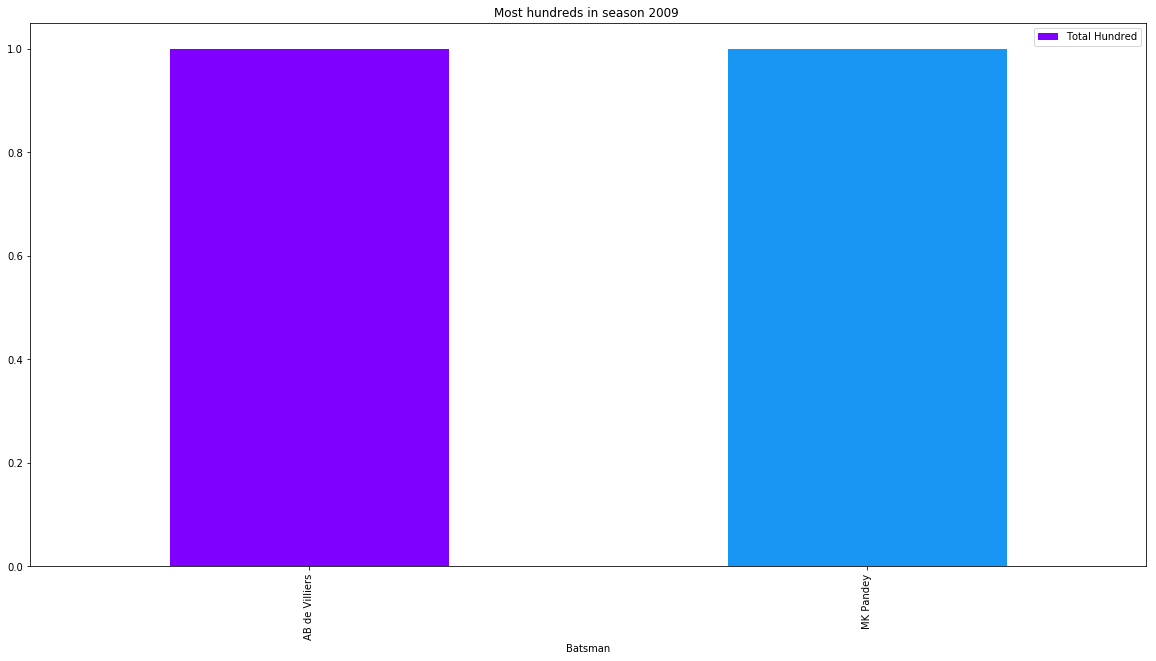

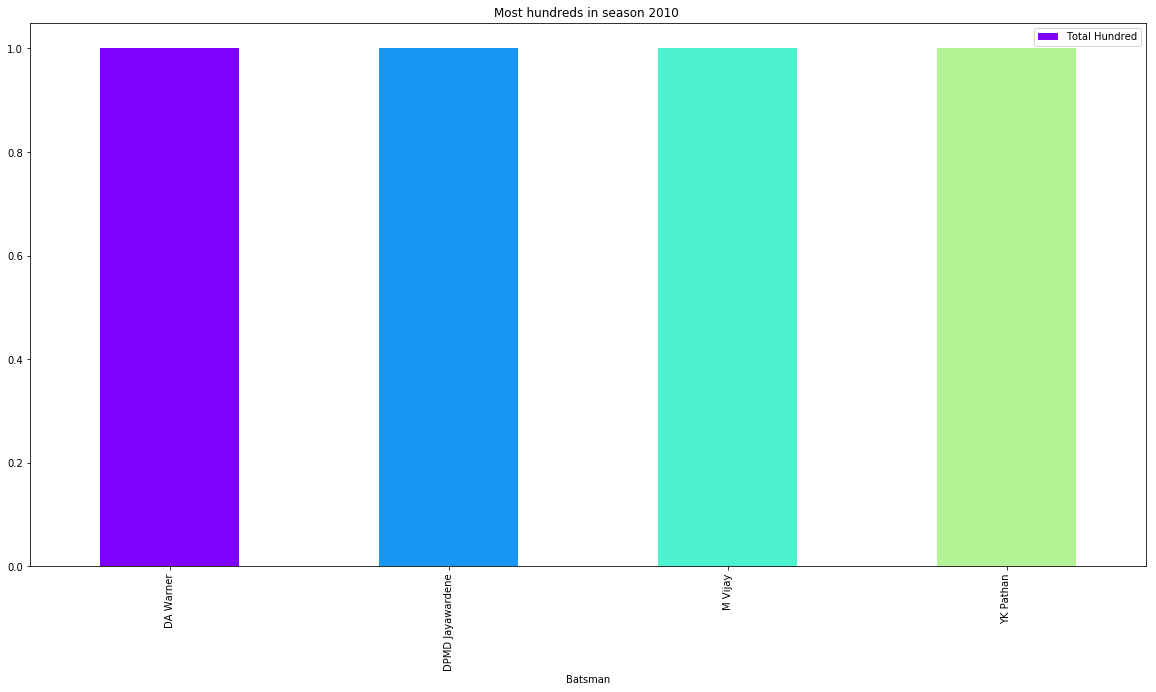

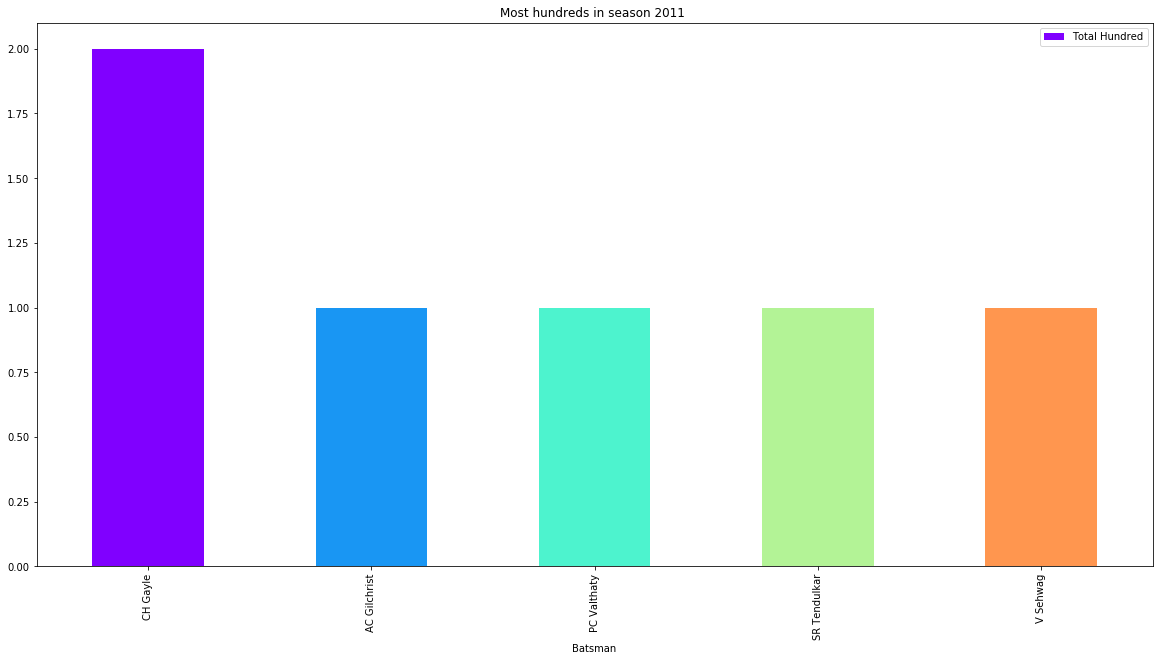

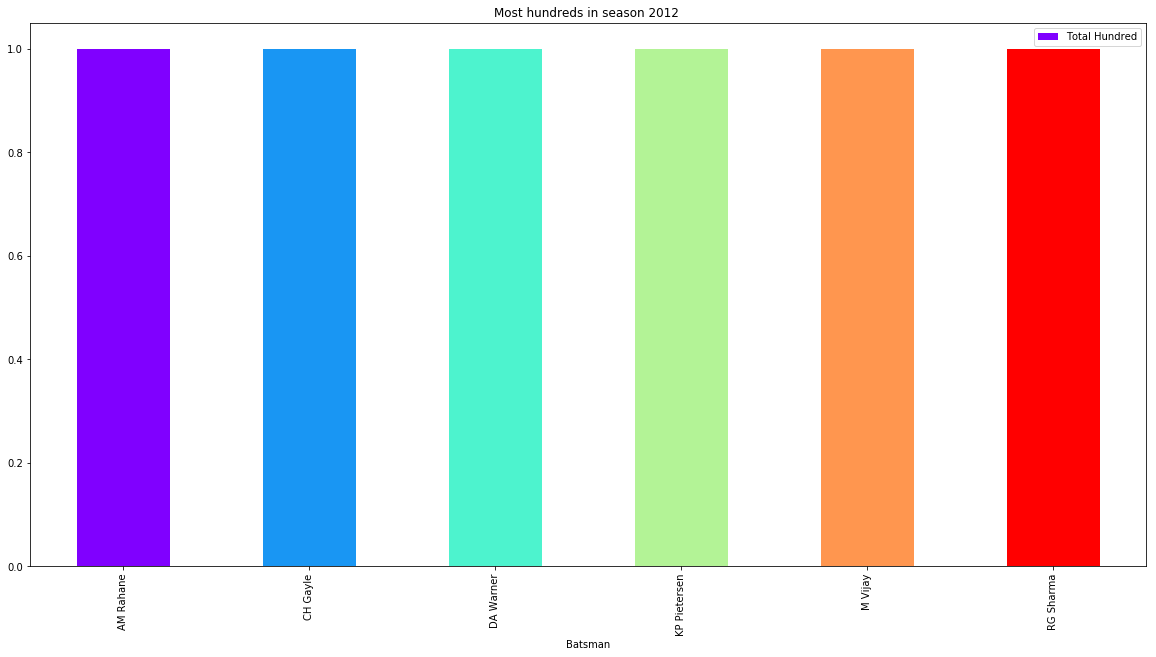

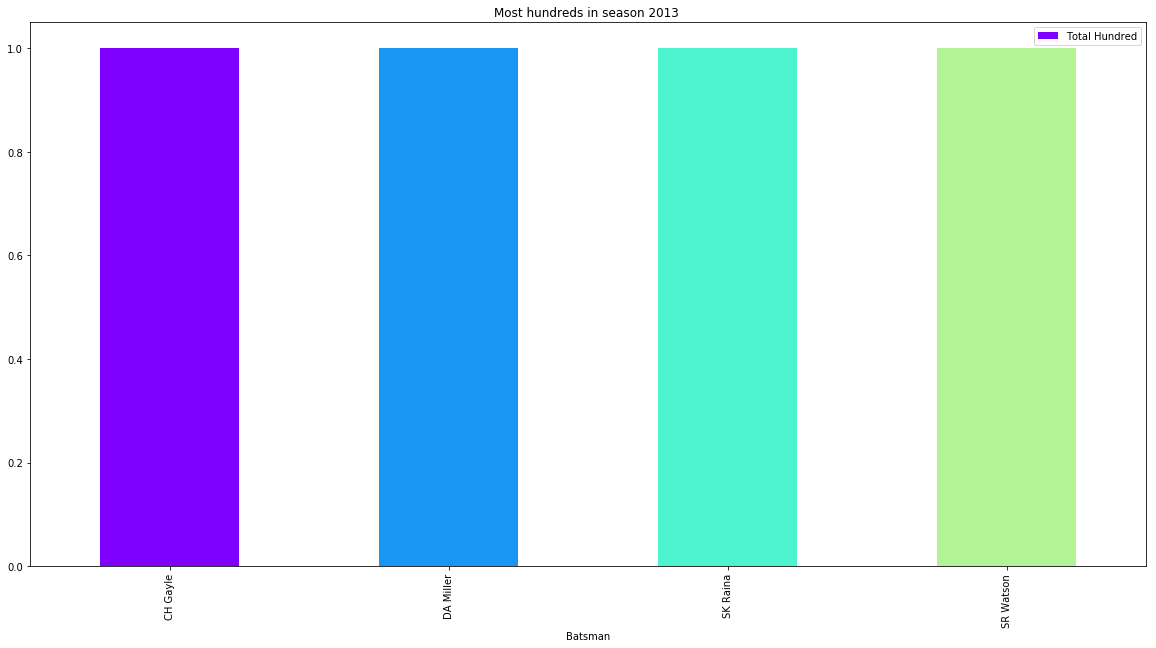

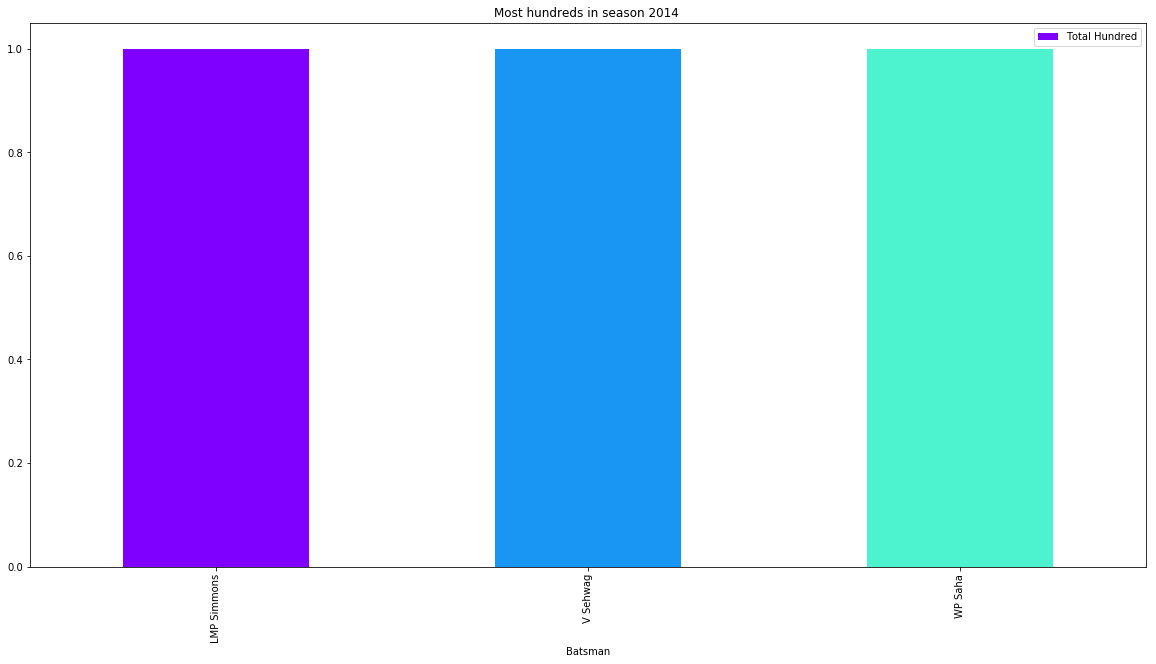

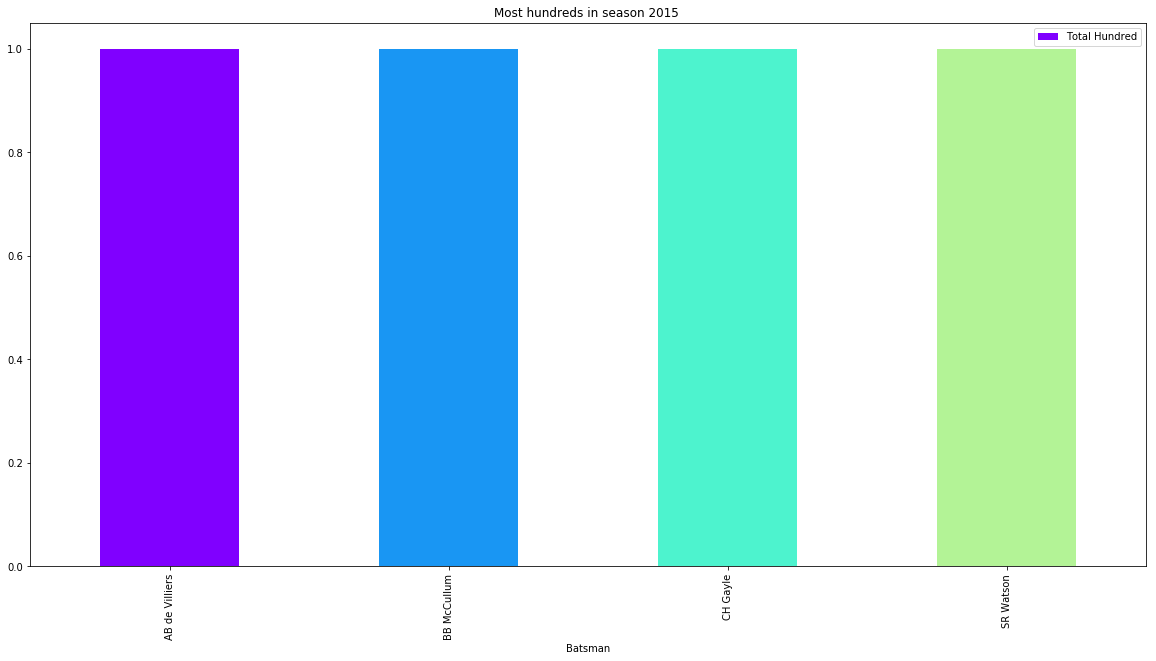

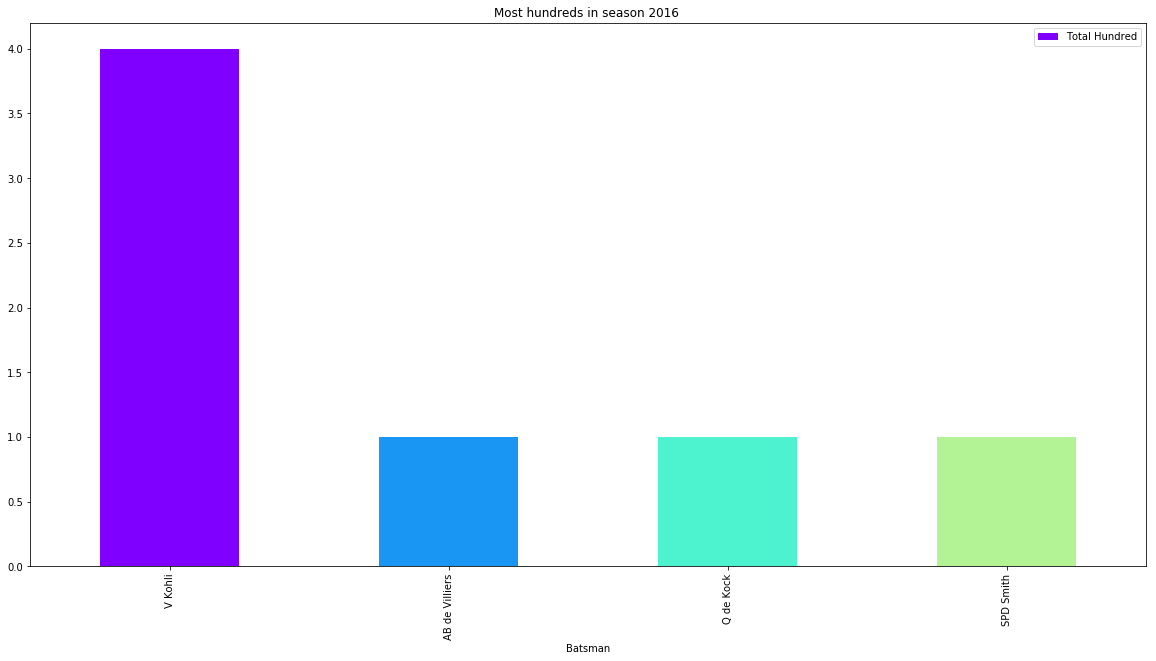

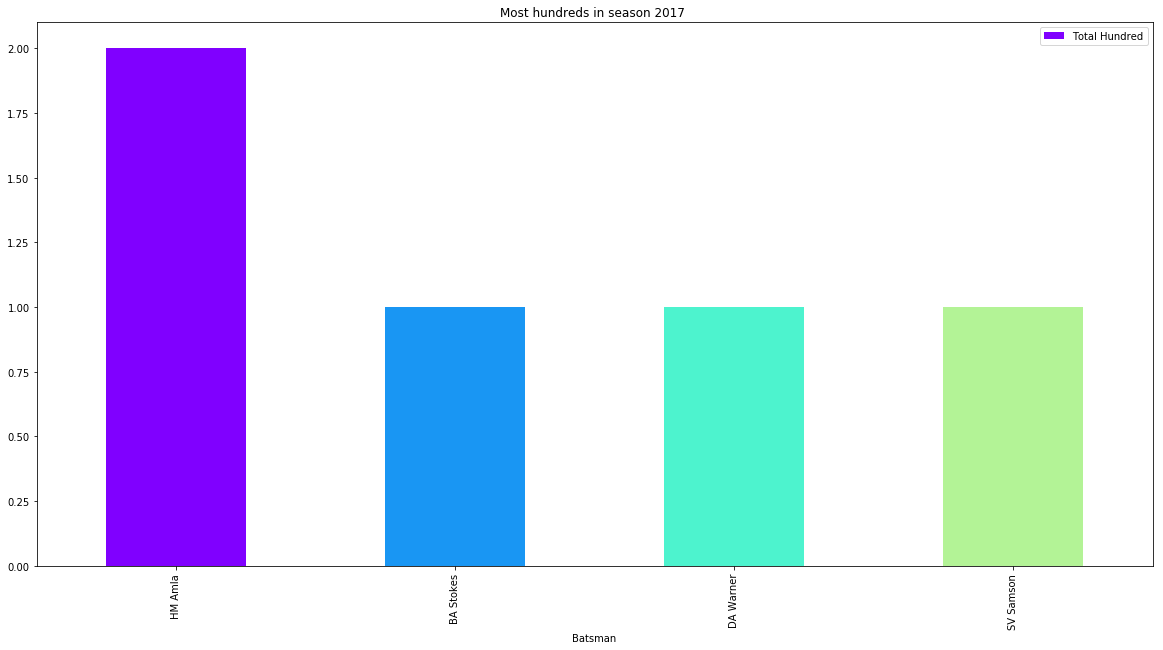

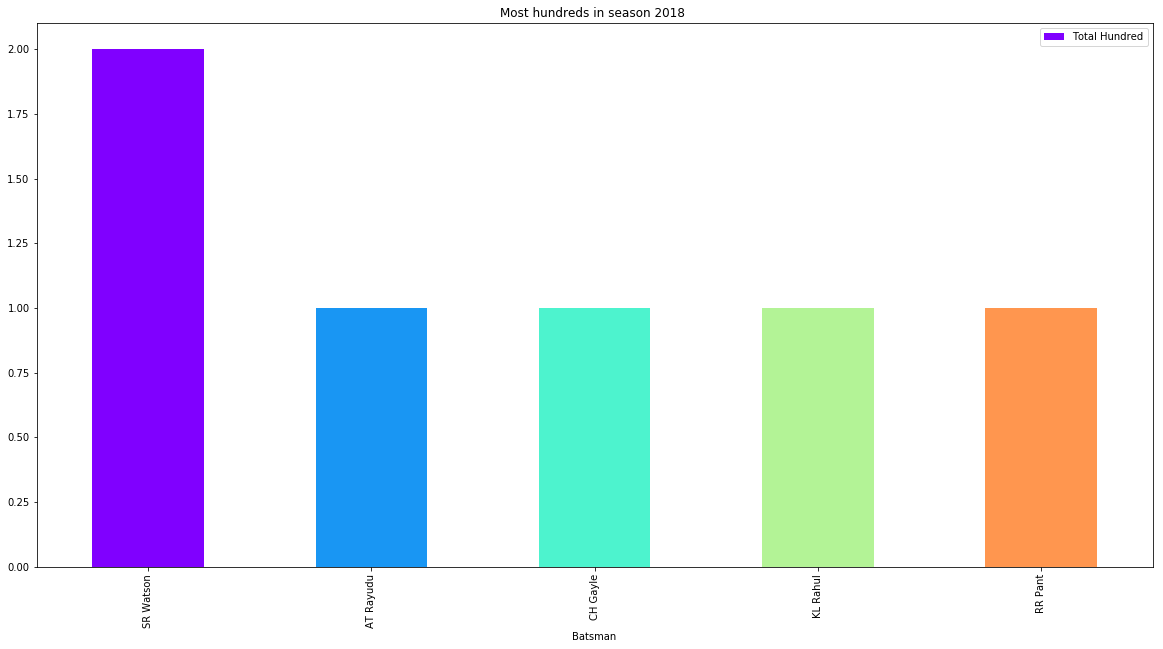

In [181]:
colors = cm.rainbow(np.linspace(0,1,6))
for title,groups in hundred_eseason.groupby(['Season']):
    groups.head(10).plot(x ='Batsman',y = 'Total Hundred',kind = 'bar',color = colors)
    plt.title('Most hundreds in season %s '%title)

Scoring hundred does not matter always, sometimes it is important that it comes in a winning cause. So lets look at how many hundred came in a winning cause across all season.

In [203]:
hundred_win = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','season','winner','batting_team']).agg({'batsman_runs':'sum'}))
hundred_win = hundred_win[hundred_win['batsman_runs'] >= 100]
hundred_win.reset_index(inplace = True)
hundred_win.head(10)

,match_id,batsman,season,winner,batting_team,batsman_runs
0,9,SV Samson,2017,Delhi Daredevils,Delhi Daredevils,102
1,22,HM Amla,2017,Mumbai Indians,Kings XI Punjab,104
2,36,DA Warner,2017,Sunrisers Hyderabad,Sunrisers Hyderabad,126
3,38,BA Stokes,2017,Rising Pune Supergiant,Rising Pune Supergiant,103
4,46,HM Amla,2017,Gujarat Lions,Kings XI Punjab,104
5,60,BB McCullum,2008,Kolkata Knight Riders,Kolkata Knight Riders,158
6,61,MEK Hussey,2008,Chennai Super Kings,Chennai Super Kings,116
7,68,A Symonds,2008,Rajasthan Royals,Deccan Chargers,117
8,72,AC Gilchrist,2008,Deccan Chargers,Deccan Chargers,109
9,96,ST Jayasuriya,2008,Mumbai Indians,Mumbai Indians,114


In [204]:
hundred_win = hundred_win[hundred_win['winner'] == hundred_win['batting_team']]
columns = ['batsman','season','batsman_runs']
hundred_win = hundred_win[columns]
hundred_win = pd.DataFrame(hundred_win.groupby(['batsman']).agg({'batsman_runs': 'count'}))
hundred_win.reset_index(inplace = True)
hundred_win.head(10)

,batsman,batsman_runs
0,AB de Villiers,3
1,AC Gilchrist,2
2,AM Rahane,1
3,AT Rayudu,1
4,BA Stokes,1
5,BB McCullum,2
6,CH Gayle,6
7,DA Miller,1
8,DA Warner,3
9,DPMD Jayawardene,1


In [205]:
hundred_win = pd.merge(hundred_win,hundred_season,left_on = 'batsman',right_on = 'batsman')
hundred_win.head()


44

In [206]:
hundred_win['Total 100s in Winning Cause'] = hundred_win['batsman_runs']/hundred_win['Total Hundred']*100
hundred_win.head()

,batsman,batsman_runs,Total Hundred,Total 100s in Winning Cause
0,AB de Villiers,3,3,100.0
1,AC Gilchrist,2,2,100.0
2,AM Rahane,1,1,100.0
3,AT Rayudu,1,1,100.0
4,BA Stokes,1,1,100.0


Now we have a list of the players and there 100s in winning cause. Let us see how many in total were in winning cause.

In [233]:
print('Total hundreds in Winning Cause:',np.sum(hundred_win['batsman_runs']))
print('Total % of 100s in Winning Cause:',round(np.sum(hundred_win['batsman_runs'])/53*100,2))     

Total hundreds in Winning Cause: 42
Total % of 100s in Winning Cause: 79.25


So we see that 79.25% of the fifties were in winning causes.

In [210]:
hundred_win = hundred_win.sort_values(by = 'Total 100s in Winning Cause',ascending = False)
hundred_win.head(10)

,batsman,batsman_runs,Total Hundred,Total 100s in Winning Cause
0,AB de Villiers,3,3,100.0
1,AC Gilchrist,2,2,100.0
22,SV Samson,1,1,100.0
21,ST Jayasuriya,1,1,100.0
19,SK Raina,1,1,100.0
18,SE Marsh,1,1,100.0
17,RG Sharma,1,1,100.0
16,Q de Kock,1,1,100.0
15,PC Valthaty,1,1,100.0
14,MK Pandey,1,1,100.0


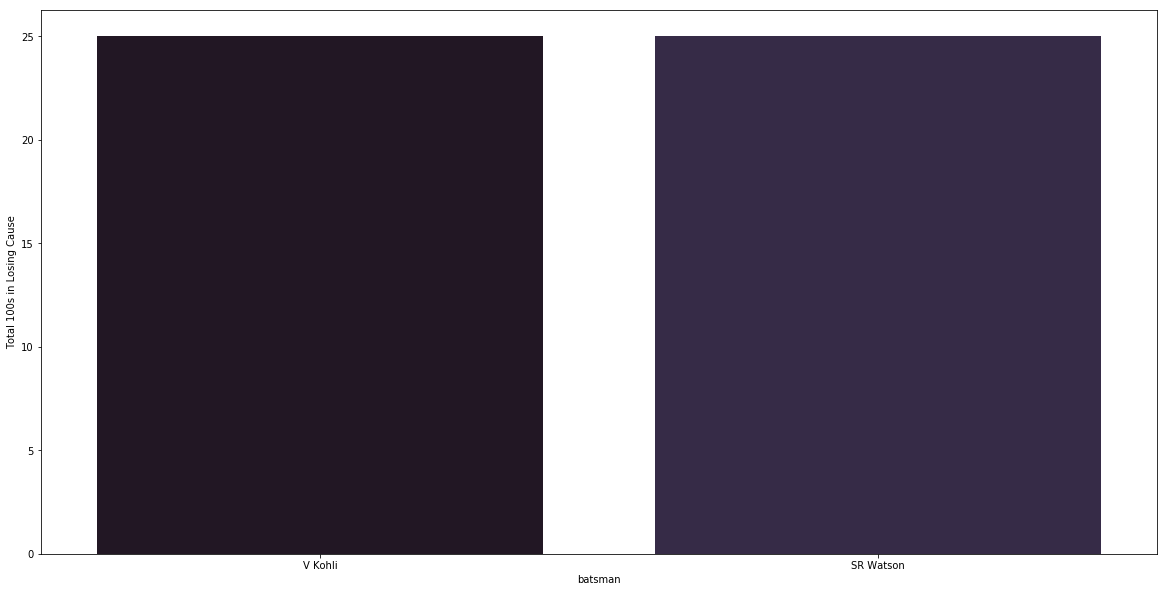

In [214]:
hundred_win['Total 100s in Losing Cause'] = 100 - hundred_win['Total 100s in Winning Cause']
hundred_win = hundred_win.sort_values(by = ['Total 100s in Losing Cause'],ascending = False)
sns.barplot(x = 'batsman',y = 'Total 100s in Losing Cause',data = hundred_win.head(2),palette = reversed(sns.color_palette("mako_r", 10)))

So V Kohli and SR Watson has hundred in winning causes.

Now only scoring 100s is not enough. Sometime the speed at which you score the 100 is equally important. So now lets look at the strike rate of each of this players when they scored 100s.

In [223]:
hundred_sr = pd.DataFrame(aggregatedata.groupby(['match_id','batsman']).agg({'batsman_runs':'sum','ball':'count'}))
hundred_sr = hundred_sr[hundred_sr['batsman_runs'] >= 100]
hundred_sr.reset_index(inplace = True)
hundred_sr.head()

,match_id,batsman,batsman_runs,ball
0,9,SV Samson,102,64
1,22,HM Amla,104,63
2,36,DA Warner,126,60
3,38,BA Stokes,103,64
4,46,HM Amla,104,61


In [225]:
hundred_sr = pd.DataFrame(hundred_sr.groupby(['batsman']).agg({'batsman_runs':'sum','ball' : 'sum'}))
hundred_sr['Strike Rate'] = hundred_sr['batsman_runs']/hundred_sr['ball']*100
hundred_sr.reset_index(inplace = True)
hundred_sr = hundred_sr.sort_values(by = ['Strike Rate'],ascending = False)

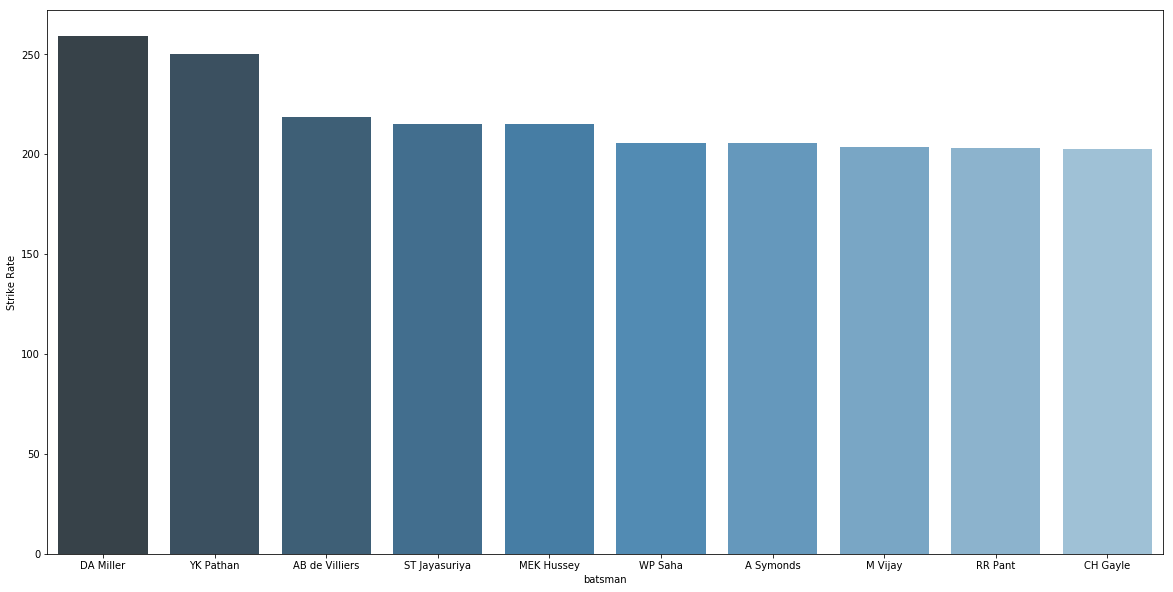

In [227]:
sns.barplot(x = 'batsman',y = 'Strike Rate',data = hundred_sr.head(10),palette = "Blues_d")

So we have DA Miller and YK PAthan topping the list of scoring 100s with the fastest rate.

We would end it by looking at which team has scored most hundred and which team has conceded most 100s.

In [230]:
hundred_scored = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','batting_team']).agg({'batsman_runs':'sum'}))
hundred_scored = hundred_scored[hundred_scored['batsman_runs'] >= 100]
hundred_scored.reset_index(inplace = True)
hundred_scored.head()

,match_id,batsman,batting_team,batsman_runs
0,9,SV Samson,Delhi Daredevils,102
1,22,HM Amla,Kings XI Punjab,104
2,36,DA Warner,Sunrisers Hyderabad,126
3,38,BA Stokes,Rising Pune Supergiant,103
4,46,HM Amla,Kings XI Punjab,104


In [231]:
hundred_scored = pd.DataFrame(hundred_scored.groupby(['batting_team']).agg({'batsman_runs':'count'}))
hundred_scored.reset_index(inplace = True)
hundred_scored.columns = ['batting_team','Total Hundred']
hundred_scored = hundred_scored.sort_values(by = ['Total Hundred'],ascending = False)
hundred_scored

,batting_team,Total Hundred
9,Royal Challengers Bangalore,12
3,Kings XI Punjab,11
0,Chennai Super Kings,8
2,Delhi Daredevils,8
5,Mumbai Indians,4
6,Rajasthan Royals,4
1,Deccan Chargers,2
4,Kolkata Knight Riders,1
7,Rising Pune Supergiant,1
8,Rising Pune Supergiants,1


So RCB has scored the most 100s as expected since they have the 3 best T20 players in their team named V Kohli, AB De Villiers, CH Gayle

In [239]:
hundred_conceded = pd.DataFrame(aggregatedata.groupby(['match_id','batsman','bowling_team']).agg({'batsman_runs':'sum'}))
hundred_conceded = hundred_conceded[hundred_conceded['batsman_runs'] >= 100]
hundred_conceded.reset_index(inplace = True)
hundred_conceded.head()

,match_id,batsman,bowling_team,batsman_runs
0,9,SV Samson,Rising Pune Supergiant,102
1,22,HM Amla,Mumbai Indians,104
2,36,DA Warner,Kolkata Knight Riders,126
3,38,BA Stokes,Gujarat Lions,103
4,46,HM Amla,Gujarat Lions,104


In [240]:
hundred_conceded = pd.DataFrame(hundred_conceded.groupby(['bowling_team']).agg({'batsman_runs':'count'}))
hundred_conceded.reset_index(inplace = True)
hundred_conceded.columns = ['bowling_team','Total Hundred']
hundred_conceded = hundred_conceded.sort_values(by = ['Total Hundred'],ascending = False)
hundred_conceded

,bowling_team,Total Hundred
6,Kolkata Knight Riders,7
3,Gujarat Lions,6
4,Kings XI Punjab,6
0,Chennai Super Kings,5
9,Rajasthan Royals,5
12,Royal Challengers Bangalore,5
13,Sunrisers Hyderabad,5
1,Deccan Chargers,4
7,Mumbai Indians,4
2,Delhi Daredevils,2


So KKR and GL has been on receiving side the most number of times